In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import shelve
import string
import numba as nb
import timeit
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import colors


In [2]:
Klist = []
Rlist = []
Plist = []
X0list = []
Y0list = []
Cblist = []
F=35
with shelve.open(f'shelve/Kbifu.shelve', 'r') as shelf:
    for K in shelf.keys():

        Plist.append(shelf[K][3])
        Klist.append(shelf[K][1])
        Rlist.append(shelf[K][2])
        X0list.append(shelf[K][4])
        Y0list.append(shelf[K][5])
        Cblist.append(shelf[K][7])
m=4
Karray= np.array(Klist[::m]) 
Rarray= np.array(Rlist[::m]) 
Parray= np.array(Plist[::m]) 
Cbarray=np.array(Cblist[::m])>0


In [3]:
Karray.shape

(101,)

In [4]:
Cbarray

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [5]:
Rmin  =  np.array([  min(np.sqrt(x0**2 + y0**2)[-10_000:])  for  x0,y0 in zip(X0list[::m],Y0list[::m])   ])
Rmax  =  np.array([  max(np.sqrt(x0**2 + y0**2)[-10_000:])  for  x0,y0 in zip(X0list[::m],Y0list[::m])   ])
X0_ct = np.array([  np.linalg.norm(x0[-1500:-1]-x0[-1499:],2)==0  for  x0 in X0list[::m]   ])
Y0_ct = np.array([  np.linalg.norm(y0[-1500:-1]-y0[-1499:],2)==0  for  y0 in Y0list[::m]   ])

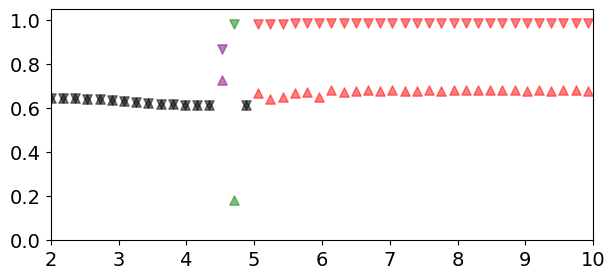

In [6]:

fig = plt.figure(figsize=(7,3))
frame1 = plt.gca()
plt.scatter(Karray[(Y0_ct + X0_ct)],Rmin[(Y0_ct + X0_ct)], color='black',marker='^', s=45, alpha=0.5)
plt.scatter(Karray[(Y0_ct + X0_ct)],Rmax[(Y0_ct + X0_ct)],s=45, color='black',marker='v', alpha=0.5)

plt.scatter(Karray[  Parray  & ((Y0_ct + X0_ct)==False)],Rmin[  Parray  & ((Y0_ct + X0_ct)==False)], color='purple',marker='^', s=45, alpha=0.5)
plt.scatter(Karray[  Parray  & ((Y0_ct + X0_ct)==False)],Rmax[  Parray  & ((Y0_ct + X0_ct)==False)],s=45, color='purple',marker='v', alpha=0.5)

plt.scatter(Karray[ (Parray == False)  & ((Y0_ct + X0_ct)==False) & (Cbarray == False)    ],\
            Rmin[ (Parray == False)  & ((Y0_ct + X0_ct)==False)  & (Cbarray == False)  ], color='red',marker='^', s=45, alpha=0.5)
plt.scatter(Karray[ (Parray == False)  & ((Y0_ct + X0_ct)==False) & (Cbarray == False)   ], \
            Rmax[ (Parray == False)  & ((Y0_ct + X0_ct)==False) & (Cbarray == False)    ],s=45, color='red',marker='v', alpha=0.5)

plt.scatter(Karray[ (Parray == False)  & ((Y0_ct + X0_ct)==False) & Cbarray  ],Rmin[ (Parray == False)  & ((Y0_ct + X0_ct)==False)   & Cbarray ],s=45, color='green',marker='^', alpha=0.5)

plt.scatter(Karray[ (Parray == False)  & ((Y0_ct + X0_ct)==False)   & Cbarray ],Rmax[ (Parray == False)  & ((Y0_ct + X0_ct)==False) & Cbarray   ],s=45, color='green',marker='v', alpha=0.5)
#plt.axis('off')
#frame1.axes.get_xaxis().set_visible(False)
#frame1.axes.get_yaxis().set_visible(False)
#plt.xlabel('K')
#plt.ylabel('r')
plt.ylim([0,1.05])
plt.xlim([2,10])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Kbifu.jpg',dpi=200,bbox_inches = 'tight')

(-0.6786373751113004,
 1.004777393268384,
 -0.45267846935324935,
 1.0453681528237946)

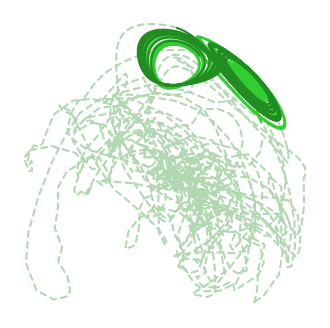

In [7]:
fig = plt.figure(figsize=(4,4))

plt.plot(X0list[60][1800:2980],Y0list[60][1800:2980],'--', color='green', alpha=0.3)
plt.plot(X0list[60][2980:6000],Y0list[60][2980:6000], color='limegreen')
plt.plot(X0list[60][100:1800],Y0list[60][100:1800], color='forestgreen')
plt.axis('off')

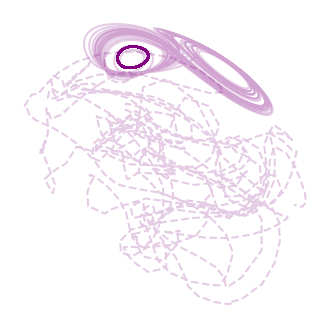

In [8]:
fig = plt.figure(figsize=(4,4))
plt.plot(X0list[55][:2000],Y0list[55][:2000],alpha=0.2,color='purple')
plt.plot(X0list[55][2000:2600],Y0list[55][2000:2600],'--',alpha=0.2,color='purple')
plt.plot(X0list[55][2800:4200],Y0list[55][2800:4200],alpha=0.2,color='purple')
plt.plot(X0list[55][6200:],Y0list[55][6200:],color='purple')
plt.axis('off')
plt.savefig('purple.jpg',dpi=200,bbox_inches = 'tight')

(-0.6746870590926752,
 1.0368156638670756,
 -0.4800812105015599,
 1.0021887792160795)

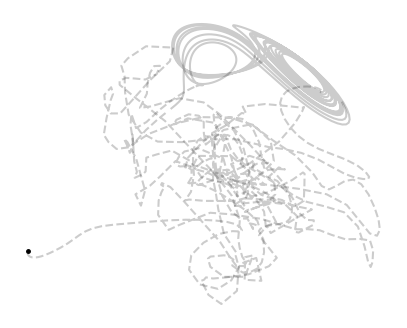

In [9]:
n=47
m1=160
m2=480
m3=1800
m4=3000
fig = plt.figure(figsize=(5,4))
plt.plot(X0list[n][:m1],Y0list[n][:m1],alpha=0.2,color='black')
plt.plot(X0list[n][m1:m2],Y0list[n][m1:m2],'--',alpha=0.2,color='black')
plt.plot(X0list[n][m2:m3],Y0list[n][m2:m3],alpha=0.2,color='black')
plt.plot(X0list[n][m3:m4],Y0list[n][m3:m4],'--',alpha=0.2,color='black')
plt.plot(X0list[n][m4],Y0list[n][m4],'.',markersize=5,color='black')
plt.axis('off')

(-0.05365170838514457,
 0.8782747720290844,
 0.44278257664778414,
 0.9972293045333882)

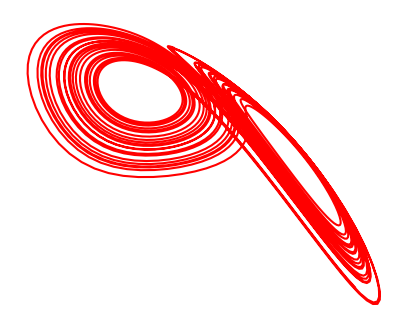

In [10]:
fig = plt.figure(figsize=(5,4))
plt.plot(X0list[320][-3000:],Y0list[320][-3000:], color='red')
plt.axis('off')
